In [107]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import json  #json형태의 컬럼값 펼치기
from pandas import json_normalize

In [108]:
df = pd.read_csv("/Users/sookyeong/Desktop/train 2.csv")

/var/folders/tz/h0d7hy211kj12my58s3b3m7m0000gn/T/ipykernel_2565/1693422276.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/Users/sookyeong/Desktop/train 2.csv")


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 903653 entries, 0 to 903652
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   channelGrouping       903653 non-null  object
 1   date                  903653 non-null  int64 
 2   device                903653 non-null  object
 3   fullVisitorId         903653 non-null  object
 4   geoNetwork            903653 non-null  object
 5   sessionId             903653 non-null  object
 6   socialEngagementType  903653 non-null  object
 7   totals                903653 non-null  object
 8   trafficSource         903653 non-null  object
 9   visitId               903653 non-null  int64 
 10  visitNumber           903653 non-null  int64 
 11  visitStartTime        903653 non-null  int64 
dtypes: int64(4), object(8)
memory usage: 82.7+ MB


In [110]:
device_df = json_normalize(df['device'].apply(json.loads))


In [111]:
geonetwork_df = json_normalize(df['geoNetwork'].apply(json.loads))

In [112]:
totals_df = json_normalize(df['totals'].apply(json.loads))

In [113]:
trafficsource_df = json_normalize(df['trafficSource'].apply(json.loads))

In [114]:
# POSIX 시간을 datetime으로 변환하여 새로운 컬럼에 저장
df['new_visitStartTime'] = pd.to_datetime(df['visitStartTime'], unit='s')  # unit='s'는 초 단위를 의미합니다.
df.head(3) 


,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,visitNumber,visitStartTime,new_visitStartTime
0,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",1131660440785968503,"{""continent"": ""Asia"", ""subContinent"": ""Western...",1131660440785968503_1472830385,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472830385,1,1472830385,2016-09-02 15:33:05
1,Organic Search,20160902,"{""browser"": ""Firefox"", ""browserVersion"": ""not ...",377306020877927890,"{""continent"": ""Oceania"", ""subContinent"": ""Aust...",377306020877927890_1472880147,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472880147,1,1472880147,2016-09-03 05:22:27
2,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",3895546263509774583,"{""continent"": ""Europe"", ""subContinent"": ""South...",3895546263509774583_1472865386,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472865386,1,1472865386,2016-09-03 01:16:26


In [115]:
# date컬럼 날짜 형식으로 변경
df['new_date'] = pd.to_datetime(df['date'], format='%Y%m%d')
df.head(3)

,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,visitNumber,visitStartTime,new_visitStartTime,new_date
0,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",1131660440785968503,"{""continent"": ""Asia"", ""subContinent"": ""Western...",1131660440785968503_1472830385,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472830385,1,1472830385,2016-09-02 15:33:05,2016-09-02
1,Organic Search,20160902,"{""browser"": ""Firefox"", ""browserVersion"": ""not ...",377306020877927890,"{""continent"": ""Oceania"", ""subContinent"": ""Aust...",377306020877927890_1472880147,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472880147,1,1472880147,2016-09-03 05:22:27,2016-09-02
2,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",3895546263509774583,"{""continent"": ""Europe"", ""subContinent"": ""South...",3895546263509774583_1472865386,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472865386,1,1472865386,2016-09-03 01:16:26,2016-09-02


In [150]:
#필요한 컬럼만 남기기
# df
df2 = pd.DataFrame(df[['channelGrouping', 'fullVisitorId', 'visitNumber', 'new_visitStartTime', 'new_date']])
df2.head(3) 

,channelGrouping,fullVisitorId,visitNumber,new_visitStartTime,new_date
0,Organic Search,1131660440785968503,1,2016-09-02 15:33:05,2016-09-02
1,Organic Search,377306020877927890,1,2016-09-03 05:22:27,2016-09-02
2,Organic Search,3895546263509774583,1,2016-09-03 01:16:26,2016-09-02


In [151]:
#device 사용컬럼만 남기기
device_df2 = pd.DataFrame(device_df[['browser', 'deviceCategory','operatingSystem']])
device_df2.head(3) 

,browser,deviceCategory,operatingSystem
0,Chrome,desktop,Windows
1,Firefox,desktop,Macintosh
2,Chrome,desktop,Windows


In [152]:
#geonetwork 사용컬럼만 남기기
geonetwork_df2 = pd.DataFrame(geonetwork_df[['continent', 'country']])
geonetwork_df2.head(3) 

,continent,country
0,Asia,Turkey
1,Oceania,Australia
2,Europe,Spain


In [153]:
#traficsource 사용컬럼만 남기기, 나머지 컬럼은 
trafficsource_df2 = pd.DataFrame(trafficsource_df[['campaign', 'source', 'medium', 'keyword']])
trafficsource_df2.head(3) 

,campaign,source,medium,keyword
0,(not set),google,organic,(not provided)
1,(not set),google,organic,(not provided)
2,(not set),google,organic,(not provided)


In [154]:
#데이터 하나로 합치기
df3 = pd.concat([df2, device_df2, geonetwork_df2, totals_df, trafficsource_df2], axis = 1)
df3.head()

,channelGrouping,fullVisitorId,visitNumber,new_visitStartTime,new_date,browser,deviceCategory,operatingSystem,continent,country,visits,hits,pageviews,bounces,newVisits,transactionRevenue,campaign,source,medium,keyword
0,Organic Search,1131660440785968503,1,2016-09-02 15:33:05,2016-09-02,Chrome,desktop,Windows,Asia,Turkey,1,1,1,1,1,NaN,(not set),google,organic,(not provided)
1,Organic Search,377306020877927890,1,2016-09-03 05:22:27,2016-09-02,Firefox,desktop,Macintosh,Oceania,Australia,1,1,1,1,1,NaN,(not set),google,organic,(not provided)
2,Organic Search,3895546263509774583,1,2016-09-03 01:16:26,2016-09-02,Chrome,desktop,Windows,Europe,Spain,1,1,1,1,1,NaN,(not set),google,organic,(not provided)
3,Organic Search,4763447161404445595,1,2016-09-03 05:40:13,2016-09-02,UC Browser,desktop,Linux,Asia,Indonesia,1,1,1,1,1,NaN,(not set),google,organic,google + online
4,Organic Search,27294437909732085,2,2016-09-02 13:23:20,2016-09-02,Chrome,mobile,Android,Europe,United Kingdom,1,1,1,1,NaN,NaN,(not set),google,organic,(not provided)


(2024.02.07)
- ## 데이터전처리 추가 진행
    - keyword, newvisits, socialEngagementType, date 컬럼 없애기 
    - transactionrevenue, bounces 결측치 0으로 대체하기 
    - 이상치 탐색 및 처리

### 컬럼 추가 없애기

In [155]:
# 필요없는 컬럼 제외
df3 = df3.drop(['keyword', 'newVisits'], axis =1)

In [156]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 903653 entries, 0 to 903652
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   channelGrouping     903653 non-null  object        
 1   fullVisitorId       903653 non-null  object        
 2   visitNumber         903653 non-null  int64         
 3   new_visitStartTime  903653 non-null  datetime64[ns]
 4   new_date            903653 non-null  datetime64[ns]
 5   browser             903653 non-null  object        
 6   deviceCategory      903653 non-null  object        
 7   operatingSystem     903653 non-null  object        
 8   continent           903653 non-null  object        
 9   country             903653 non-null  object        
 10  visits              903653 non-null  object        
 11  hits                903653 non-null  object        
 12  pageviews           903553 non-null  object        
 13  bounces             450630 no

### 결측치 처리

In [157]:
#transactionrevenue, bounces, pageviews 결측치 0으로 채우기
df3['transactionRevenue'] = df3['transactionRevenue'].fillna(0)
df3['bounces'] = df3['bounces'].fillna(0)
df3['pageviews'] = df3['pageviews'].fillna(0)

In [158]:
#결측치 처리 확인
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 903653 entries, 0 to 903652
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   channelGrouping     903653 non-null  object        
 1   fullVisitorId       903653 non-null  object        
 2   visitNumber         903653 non-null  int64         
 3   new_visitStartTime  903653 non-null  datetime64[ns]
 4   new_date            903653 non-null  datetime64[ns]
 5   browser             903653 non-null  object        
 6   deviceCategory      903653 non-null  object        
 7   operatingSystem     903653 non-null  object        
 8   continent           903653 non-null  object        
 9   country             903653 non-null  object        
 10  visits              903653 non-null  object        
 11  hits                903653 non-null  object        
 12  pageviews           903653 non-null  object        
 13  bounces             903653 no

### EDA 및 이상치 처리
    - 범주형 : channelGrouping, browser, deviceCategory, operatingSystem, continent, country, campaign, source, medium
    - 수치형 : hits, pageviews, bounces, transactionRevenue -> object 타입으로 되어있음

In [159]:
#totals 파생 컬럼 수치형으로 변경해
df3['visits'] = df3['visits'].astype(int)
df3['hits'] = df3['hits'].astype(int)
df3['pageviews'] = df3['pageviews'].astype(int)
df3['bounces'] = df3['bounces'].astype(int)
df3['transactionRevenue'] = df3['transactionRevenue'].astype(int)

In [160]:
df3.describe(include = 'all')

,channelGrouping,fullVisitorId,visitNumber,new_visitStartTime,new_date,browser,deviceCategory,operatingSystem,continent,country,visits,hits,pageviews,bounces,transactionRevenue,campaign,source,medium
count,903653,9.036530e+05,903653.000000,903653,903653,903653,903653,903653,903653,903653,903653.0,903653.000000,903653.000000,903653.000000,9.036530e+05,903653,903653,903653
unique,8,7.427350e+05,NaN,NaN,NaN,54,3,20,6,222,NaN,NaN,NaN,NaN,NaN,10,380,7
top,Organic Search,8.248397e+17,NaN,NaN,NaN,Chrome,desktop,Windows,Americas,United States,NaN,NaN,NaN,NaN,NaN,(not set),google,organic
freq,381561,2.050000e+02,NaN,NaN,NaN,620364,664479,350072,450377,364744,NaN,NaN,NaN,NaN,NaN,865347,400788,381561
mean,NaN,NaN,2.264897,2017-01-21 14:01:30.059528448,2017-01-20 18:54:58.635206400,NaN,NaN,NaN,NaN,NaN,1.0,4.596538,3.849338,0.498676,1.704273e+06,NaN,NaN,NaN
min,NaN,NaN,1.000000,2016-08-01 07:00:12,2016-08-01 00:00:00,NaN,NaN,NaN,NaN,NaN,1.0,1.000000,0.000000,0.000000,0.000000e+00,NaN,NaN,NaN
25%,NaN,NaN,1.000000,2016-10-27 09:39:29,2016-10-27 00:00:00,NaN,NaN,NaN,NaN,NaN,1.0,1.000000,1.000000,0.000000,0.000000e+00,NaN,NaN,NaN
50%,NaN,NaN,1.000000,2017-01-09 08:02:14,2017-01-09 00:00:00,NaN,NaN,NaN,NaN,NaN,1.0,2.000000,1.000000,0.000000,0.000000e+00,NaN,NaN,NaN
75%,NaN,NaN,1.000000,2017-04-21 07:12:42,2017-04-21 00:00:00,NaN,NaN,NaN,NaN,NaN,1.0,4.000000,4.000000,1.000000,0.000000e+00,NaN,NaN,NaN
max,NaN,NaN,395.000000,2017-08-02 06:59:53,2017-08-01 00:00:00,NaN,NaN,NaN,NaN,NaN,1.0,500.000000,469.000000,1.000000,2.312950e+10,NaN,NaN,NaN


## DAU, WAU, MAU 살펴보기
- 날짜 : new_date
- 사용자 : fullVisitorId

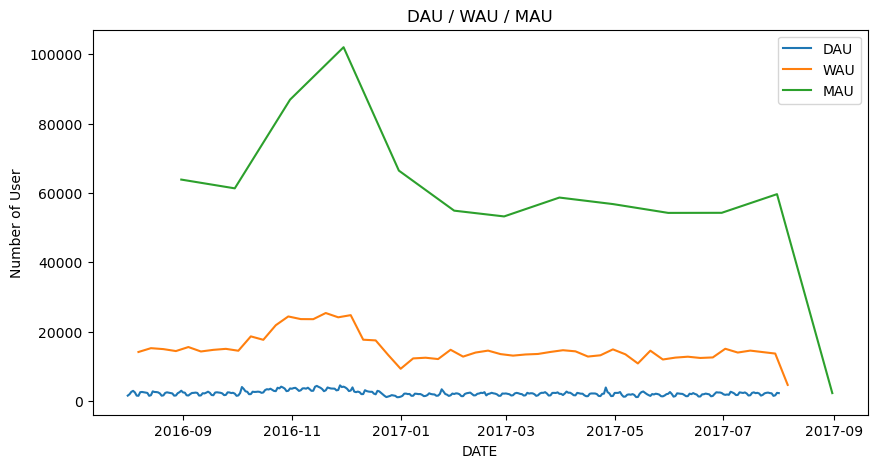

In [161]:
dau = df3.groupby(df3['new_date'])['fullVisitorId'].nunique()
wau = df3.groupby(df3['new_date'].dt.to_period('W'))['fullVisitorId'].nunique()
mau = df3.groupby(df3['new_date'].dt.to_period('M'))['fullVisitorId'].nunique()

plt.figure(figsize=(10,5))
plt.plot(dau, label = 'DAU')
plt.plot(wau, label = 'WAU')
plt.plot(mau, label = 'MAU')
plt.xlabel('DATE')
plt.ylabel('Number of User')
plt.title('DAU / WAU / MAU')
plt.legend()

## 유저별 평균접속시간의 분포를 ECDF로 시각화
- ECDF란? 데이터의 누적 분포를 시각화한 것
- x ; 유저
- Y : 평균접속시간

In [164]:
df3.head(3)

,channelGrouping,fullVisitorId,visitNumber,new_visitStartTime,new_date,browser,deviceCategory,operatingSystem,continent,country,visits,hits,pageviews,bounces,transactionRevenue,campaign,source,medium
0,Organic Search,1131660440785968503,1,2016-09-02 15:33:05,2016-09-02,Chrome,desktop,Windows,Asia,Turkey,1,1,1,1,0,(not set),google,organic
1,Organic Search,377306020877927890,1,2016-09-03 05:22:27,2016-09-02,Firefox,desktop,Macintosh,Oceania,Australia,1,1,1,1,0,(not set),google,organic
2,Organic Search,3895546263509774583,1,2016-09-03 01:16:26,2016-09-02,Chrome,desktop,Windows,Europe,Spain,1,1,1,1,0,(not set),google,organic


1. (easy ver) daily로 첫 접속과 마지막 접속 사이의 길이를 평균 접속 시간으로 간주
- 이 경우 00시가 지나가면 같은 세션이라도 분리되는 리스크가 있는데, 경험적으로 큰 임팩트를 갖지는 않았습니다.
    - 유저별 첫접속, 마지막접속 구하기
    - 첫 접속과 마지막접속 간의 평균을 구해 ecdf 그리기


In [245]:
#유저별 첫 번째 접속과 마지막 접속을 파악하여 DataFrame을 재구성
first_last_visit = df3.groupby([df3['fullVisitorId'], df3['new_visitStartTime'].dt.date])['new_visitStartTime'].agg(['first', 'last'])
first_last_visit.head(3)

,,first,last
fullVisitorId,new_visitStartTime,,
5103959234087,2016-08-21,2016-08-21 22:06:48,2016-08-21 22:06:48
10278554503158,2016-10-21,2016-10-21 05:57:46,2016-10-21 05:57:46
20424342248747,2016-12-01,2016-12-01 07:55:01,2016-12-01 07:55:01


In [251]:
# 각 사용자의 접속 기간을 계산하여 새로운 열로 추가
first_last_visit['session_duration'] = first_last_visit['last'] - first_last_visit['first']
first_last_visit.head(3)
#session_duration이 음수값도 있음 -> 제외 필요

,,first,last,session_duration
fullVisitorId,new_visitStartTime,,,
5103959234087,2016-08-21,2016-08-21 22:06:48,2016-08-21 22:06:48,0 days
10278554503158,2016-10-21,2016-10-21 05:57:46,2016-10-21 05:57:46,0 days
20424342248747,2016-12-01,2016-12-01 07:55:01,2016-12-01 07:55:01,0 days


In [ ]:
# 마지막 접속 시간이 처음 접속 시간보다 큰 행만 선택하여 새로운 DataFrame을 생성
filtered_data = first_last_visit[first_last_visit['last'] > first_last_visit['first']]
# 세션 지속 시간을 계산하여 새로운 열로 추가 
filtered_data['session_duration'] = filtered_data['last'] - filtered_data['first']

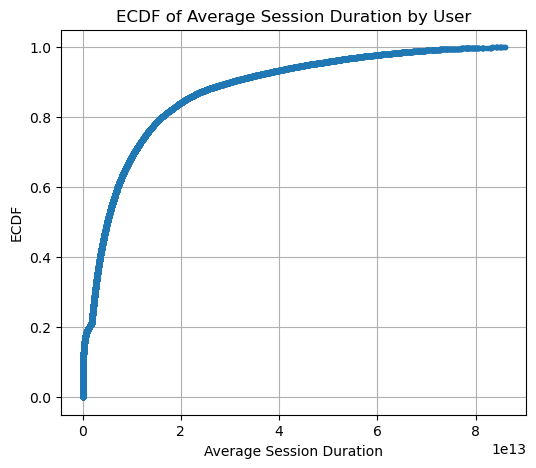

In [260]:
#유저별 평균 접속시간 계산하기
#이미 사용자별 접속시간을 구했으므로(session_duration) 해당 컬럼으로 groupby 
#level = 0 : 사용자별로 다 시그룹화하는데 사용되는 인덱스 레벨 -> fullVisitorId
mean_session_duration = filtered_data['session_duration'].groupby(level=0).mean()

#ecdf계산
def ecdf(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n + 1) / n
    return x, y

x, y = ecdf(mean_session_duration)


# 시각화
plt.figure(figsize=(6, 5))
plt.plot(x, y, marker='.', linestyle='none')
plt.xlabel('Average Session Duration')
plt.ylabel('ECDF')
plt.title('ECDF of Average Session Duration by User')
plt.grid(True)
plt.show()


- y축 0.5기준으로 평균접속시간이 늘어난다.
- 데이터 분포가 right-skew됨을 알 수 있다. 

## APPENDIX

In [ ]:
#DAU groupby 이용하기
dau = df3.groupby(df['new_visitStartTime'].dt.date)['fullVisitorId'].nunique()
dau

new_visitStartTime
2016-08-01    1197
2016-08-02    1820
2016-08-03    2511
2016-08-04    2959
2016-08-05    2745
              ... 
2017-07-29    1676
2017-07-30    1513
2017-07-31    2292
2017-08-01    2364
2017-08-02     597
Name: fullVisitorId, Length: 367, dtype: int64

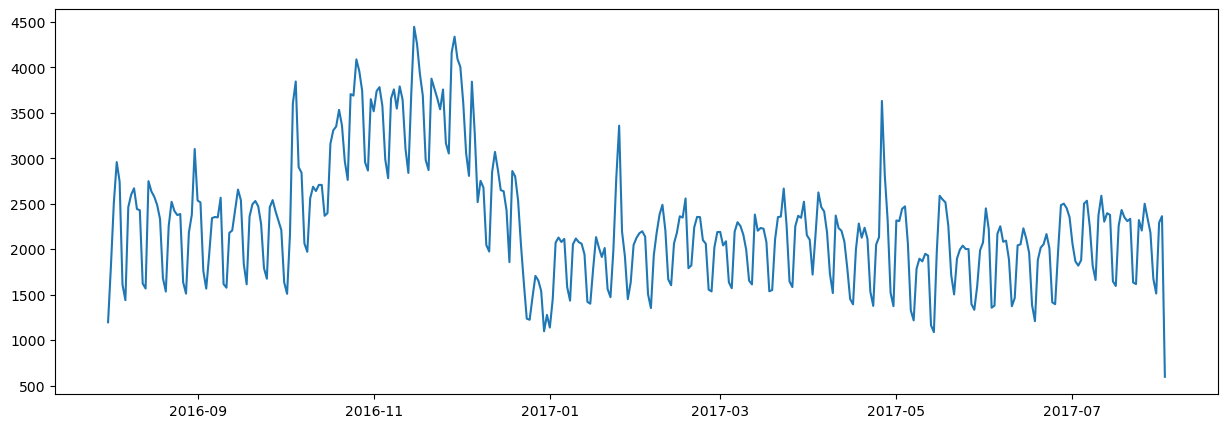

In [ ]:
#dau 그래프
plt.figure(figsize=(15, 5))
plt.plot(dau)
plt.show()

In [ ]:
#wau 구하기
start_date = pd.Timestamp('2016-08-01')
end_date = pd.Timestamp('2017-07-31')
filtered_data = df[(df['new_visitStartTime'] >= start_date) & (df['new_visitStartTime'] <= end_date)]

wau = filtered_data.resample('W-Mon', on='new_visitStartTime')['fullVisitorId'].nunique()
wau

new_visitStartTime
2016-08-01     1197
2016-08-08    14888
2016-08-15    15539
2016-08-22    14599
2016-08-29    14398
2016-09-05    15303
2016-09-12    14482
2016-09-19    14938
2016-09-26    15135
2016-10-03    14308
2016-10-10    19028
2016-10-17    18156
2016-10-24    22202
2016-10-31    24384
2016-11-07    23405
2016-11-14    23761
2016-11-21    25427
2016-11-28    24449
2016-12-05    24697
2016-12-12    16993
2016-12-19    17463
2016-12-26    12348
2017-01-02     9250
2017-01-09    12824
2017-01-16    12357
2017-01-23    12262
2017-01-30    14879
2017-02-06    12785
2017-02-13    14045
2017-02-20    14582
2017-02-27    13531
2017-03-06    13180
2017-03-13    13793
2017-03-20    13199
2017-03-27    14321
2017-04-03    14625
2017-04-10    14485
2017-04-17    12666
2017-04-24    13155
2017-05-01    15294
2017-05-08    13109
2017-05-15    11185
2017-05-22    14326
2017-05-29    11801
2017-06-05    13072
2017-06-12    12674
2017-06-19    12237
2017-06-26    12643
2017-07-03    15028
2

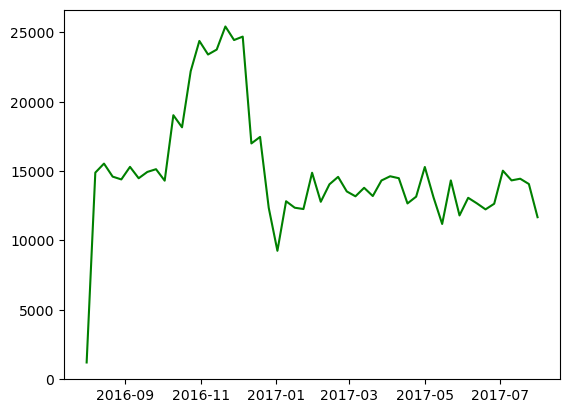

In [ ]:
plt.plot(wau, color = 'green')

In [ ]:
#mau 구하기
start_date = pd.Timestamp('2016-08-01')
end_date = pd.Timestamp('2017-07-31')
filtered_data = df[(df['new_visitStartTime'] >= start_date) & (df['new_visitStartTime'] <= end_date)]

# 월별로 사용자를 그룹화하고 MAU 계산
mau = filtered_data.resample('M', on='new_visitStartTime')['fullVisitorId'].nunique()
mau

new_visitStartTime
2016-08-31     63316
2016-09-30     61491
2016-10-31     86516
2016-11-30    101836
2016-12-31     67274
2017-01-31     54720
2017-02-28     53209
2017-03-31     58755
2017-04-30     56859
2017-05-31     54245
2017-06-30     54094
2017-07-31     57813
Freq: M, Name: fullVisitorId, dtype: int64

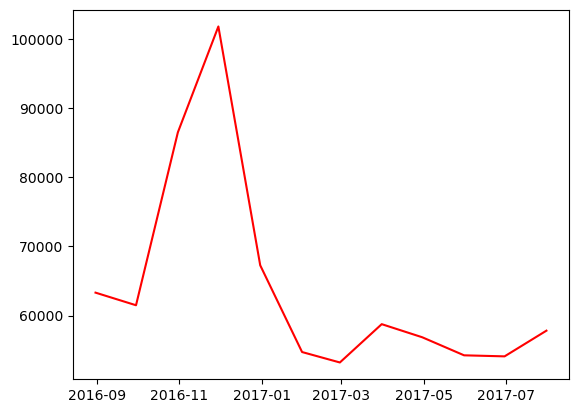

In [ ]:
plt.plot(mau, color = 'red')

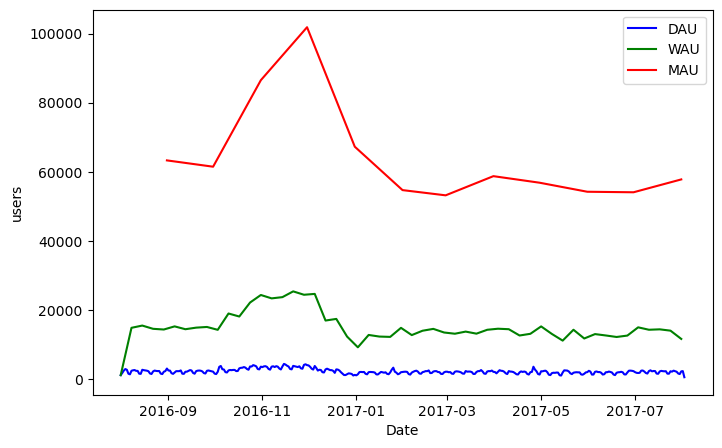

In [ ]:
#dau, mau 그래프 합치기
plt.figure(figsize=(8,5))
plt.plot(dau, label = 'DAU', color = 'blue')
plt.plot(wau, label = 'WAU', color = 'green')
plt.plot(mau, label = 'MAU', color = 'red')
plt.xlabel('Date')
plt.ylabel('users')
plt.legend()
plt.show()

<Axes: xlabel='deviceCategory', ylabel='transactionRevenue'>

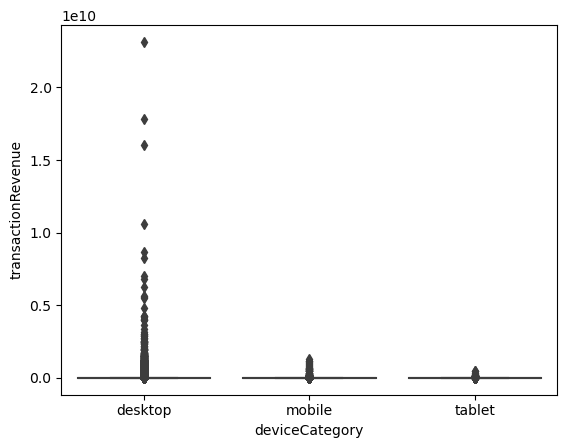

In [144]:
sns.boxplot(data = df3, x = 'deviceCategory', y = 'transactionRevenue')

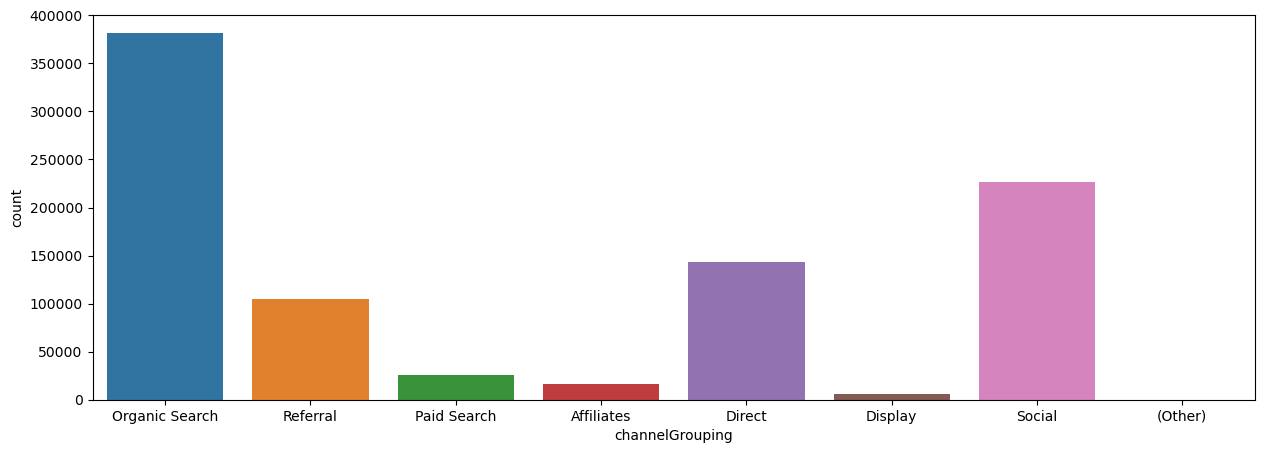

In [ ]:
#channelgrouping 
plt.figure(figsize = (15, 5))
sns.countplot(data = df3, x = 'channelGrouping')
plt.show()
#organic Search 유입이 가장 많으며 다음은 social을 통한 유입이 많다. --> social 마케팅 강화 방법